In [239]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from textblob import Word
import contractions
import string
from datetime import datetime, timedelta

In [240]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\singl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [241]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [242]:
journal_df = pd.read_csv('journal_entries.csv');
journal_df.head(10)

,entry,date
0,"My family was the most salient part of my day,...",08-12-2017
1,Yoga keeps me focused. I am able to take some ...,09-12-2017
2,"Yesterday, my family and I played a bunch of b...",10-12-2017
3,"Yesterday, I visited my parents and had dinner...",11-12-2017
4,"Yesterday, I really felt the importance of my ...",12-12-2017
5,"Yesterday, I had to go to work. It was my firs...",13-12-2017
6,"Yesterday, I got a lot of things ready for lis...",14-12-2017
7,"Yesterday, I finished two of the requirements ...",15-12-2017
8,yesterday work was like the good old days. The...,16-12-2017
9,Yesterday was the sixth of the month so I read...,17-12-2017


In [243]:
def word_count(entry):
    total_word_count=0
    for word in entry.split(" "):
        total_word_count = 1 + total_word_count
    return total_word_count
journal_df['word_count'] = journal_df['entry'].apply(word_count)
journal_df['paragraph_count'] = journal_df['entry'].apply(lambda x: 1)


In [244]:
journal_df.head()['entry'][0]

'My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. my anxiety is higher than ever. I am often overwhelmed by the care the require.'

In [245]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(str.lower(sentence))
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list

In [247]:
def sentences_tokenized(entry):
    sent_list =[]
   
    sent_list.append(sent_tokenize(entry))
    return sent_list
journal_df['sentences_tokenized'] = journal_df['entry'].apply(sentences_tokenized)

def lemmatize(entry):
    word_list = []
    #lem = WordNetLemmatizer()
    for paragraph in entry.split(" "):
        paragraph_fixed = str.lower(paragraph)
        paragraph_fixed = contractions.fix(paragraph_fixed)
        word_list = word_list + lemmatize_with_postag(paragraph_fixed)
    return word_list
journal_df['lemmatized_words'] = journal_df['entry'].apply(lemmatize)
journal_df.head()

,entry,date,word_count,paragraph_count,sentences_tokenized,lemmatized_words
0,"My family was the most salient part of my day,...",08-12-2017,40,1,[[My family was the most salient part of my da...,"[my, family, be, the, most, salient, part, of,..."
1,Yoga keeps me focused. I am able to take some ...,09-12-2017,32,1,"[[Yoga keeps me focused., I am able to take so...","[yoga, keep, me, focus, i, be, able, to, take,..."
2,"Yesterday, my family and I played a bunch of b...",10-12-2017,47,1,"[[Yesterday, my family and I played a bunch of...","[yesterday, my, family, and, i, played, a, bun..."
3,"Yesterday, I visited my parents and had dinner...",11-12-2017,31,1,"[[Yesterday, I visited my parents and had dinn...","[yesterday, i, visit, my, parent, and, have, d..."
4,"Yesterday, I really felt the importance of my ...",12-12-2017,66,1,"[[Yesterday, I really felt the importance of m...","[yesterday, i, really, felt, the, importance, ..."


In [248]:
#journal_df.head()['sentences_tokenized'][2]

In [249]:
from nltk.tokenize import word_tokenize
import matplotlib.style as style
import matplotlib as mpl

In [250]:
def extract_year(date):
    return date[6:10]
journal_df['year']=journal_df['date'].apply(extract_year)

In [251]:
journal_df.tail()

,entry,date,word_count,paragraph_count,sentences_tokenized,lemmatized_words,year
1468,"A workout, dining with friends makes for a hea...",15-12-2021,16,1,"[[A workout, dining with friends makes for a h...","[a, workout, din, with, friend, make, for, a, ...",2021
1469,"My connection to God, through prayer brings me...",16-12-2021,21,1,"[[My connection to God, through prayer brings ...","[my, connection, to, god, through, prayer, bri...",2021
1470,"I got a skull pan for halloween, and my husban...",17-12-2021,45,1,"[[I got a skull pan for halloween, and my husb...","[i, get, a, skull, pan, for, halloween, and, m...",2021
1471,I spoke over the phone with my brother that li...,18-12-2021,71,1,[[I spoke over the phone with my brother that ...,"[i, spoke, over, the, phone, with, my, brother...",2021
1472,"I had a lengthy but mostly fun, frivolous conv...",19-12-2021,36,1,"[[I had a lengthy but mostly fun, frivolous co...","[i, have, a, lengthy, but, mostly, fun, frivol...",2021


In [252]:
def unique_words_per_year(journal):
    list_of_dicts=[]
    unique_years =  list(journal.year.unique())
    for year in unique_years:
        d={}
        words_list = []
        year_mask = journal.year==year
        #original method, looking at ALL words
        for i, row in journal[year_mask].iterrows():
            for paragraph in row['sentences_tokenized']:
                
                for sentence in paragraph:
                    tokenized_sentence = word_tokenize(str.lower(sentence))
                    for word in tokenized_sentence:
                        if word not in words_list:
                            words_list.append(word)
        lemm_words_list=[]
        for i, row in journal[year_mask].iterrows():
            for word in row['lemmatized_words']:
                if word not in lemm_words_list:
                    lemm_words_list.append(word)
        d['Year'] = year
        d['unique_words_list'] = words_list
        d['unique_words_count'] = len(words_list)
        d['lemm_unique_words_list'] = lemm_words_list
        d['lemm_unique_words_count'] = len(lemm_words_list)       
        
        list_of_dicts.append(d)
    return pd.DataFrame(list_of_dicts)

unique_words_by_year = unique_words_per_year(journal_df)
unique_words_by_year = unique_words_by_year.set_index('Year')

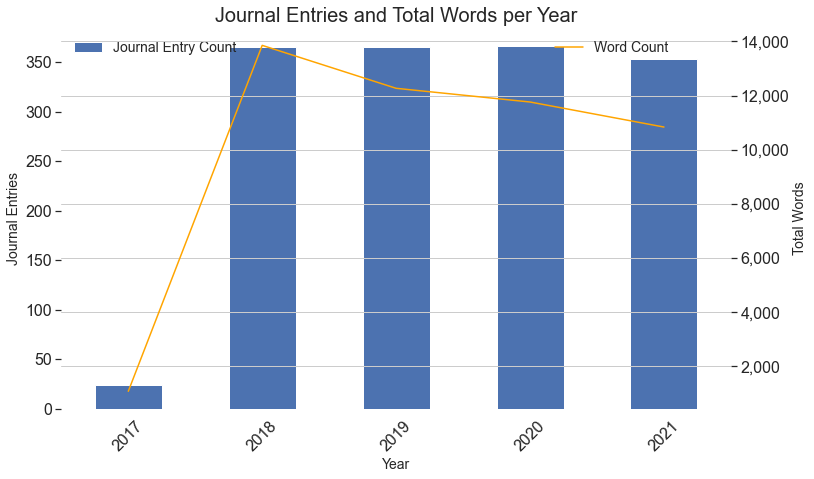

In [253]:
#Simple aggragations for entries/words per year.
entries_per_year = journal_df['year'].value_counts().sort_index()
words_per_year = journal_df.groupby('year')['word_count'].sum()

#uniques by year calculation
unique_word_year = unique_words_by_year.sort_index()
unique_word_year = unique_words_by_year['lemm_unique_words_count']
uniques_per_total_words = unique_word_year/words_per_year
words_entry_year = words_per_year / entries_per_year

import matplotlib as mpl
from matplotlib import pyplot as plt
fig, axes = plt.subplots(figsize=(12,7))
ax = entries_per_year.plot(kind='bar')
ax.set_title("Journal Entries and Total Words per Year", fontsize=20)
ax2 = words_per_year.plot(secondary_y=True, ax=ax, fontsize=16, color='orange')
ax.set_xlabel('Year', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Journal Entries', fontsize=14)
ax2.set_ylabel('Total Words', fontsize=14)
ax.legend(["Journal Entry Count"], loc='best', prop={"size":14})
ax2.legend(["Word Count"], bbox_to_anchor=(.925, 1.00), prop={"size":14})

#iterate through axes, to do basic formating
for i, ax in enumerate(fig.axes):
    #add comma
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    #remove spines
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.xlabel = "Year"
ax.autoscale(tight=False)

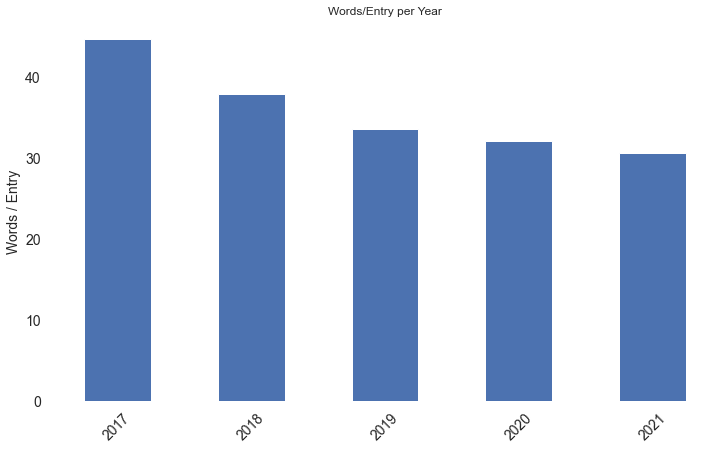

In [254]:
style.use('seaborn-ticks')
fig, axes = plt.subplots(figsize=(12,7))

ax = words_entry_year.plot(kind='bar', fontsize=14, title ="Words/Entry per Year")
ax.set_xlabel('')
ax.set_ylabel('Words / Entry', fontsize=14)
ax.tick_params(axis='x', rotation=45)

#iterate through axes, to do basic formating
for i, ax in enumerate(fig.axes):
    #add comma
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    #remove spines
    for key, spine in ax.spines.items():
        spine.set_visible(False)

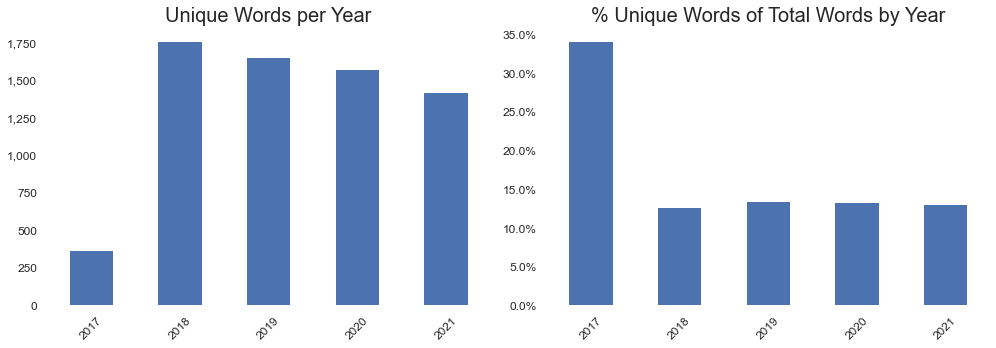

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
unique_word_year.plot(kind='bar',fontsize=12, ax=axes[0])
axes[0].set_title('Unique Words per Year', fontsize=20)
uniques_per_total_words.plot(kind='bar', fontsize=12, ax=axes[1])
axes[1].set_title('% Unique Words of Total Words by Year', fontsize=20)

#iterate through axes, to do basic formating
for i, ax in enumerate(fig.axes):
    #add comma
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    #remove spines
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
fig.tight_layout()

In [256]:
##########################

###########MOST COMMON WORDS###############

#################################

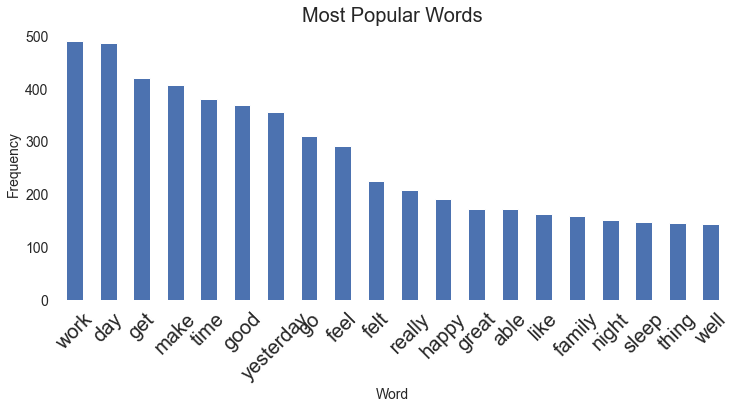

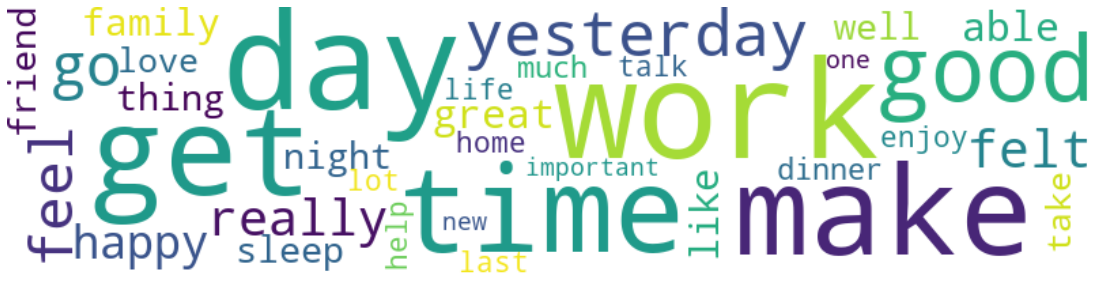

In [257]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud


#filter out stop words
stop_words = stopwords.words('english')
#Exclude puntuation
punc = string.punctuation
for thing in punc:
    stop_words.append(thing)
stop_words.append('’')
stop_words.append('”')
stop_words.append('“')

#itterate through lemmatized words, create word_list and frequency distribution
word_list =[]
for i, row in journal_df.iterrows():
    for word in row['lemmatized_words']:
        if word not in stop_words:
            word_list.append(word)
fdist = FreqDist(word_list)

#convert fdist to DF
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist.sort_values('Frequency', ascending=False, inplace=True)

#Visualize
chart = df_fdist.head(20).plot(kind='bar', fontsize=14, figsize=(12, 5))
plt.title("Most Popular Words", fontsize=20)
chart.set_xlabel("Word", fontsize=14)
chart.set_ylabel("Frequency", fontsize=14)
chart.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in chart.spines.items():
    spine.set_visible(False)
plt.grid(False)
plt.xticks(fontsize=20)
chart.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
chart.tick_params(axis='x', rotation=45 )
chart.get_legend().remove()
plt.show(chart)

#Create word cloud
wordcloud = WordCloud(max_words=35, max_font_size=100, width=800, height=200, margin=0, background_color = "white")
wordcloud.generate_from_frequencies(frequencies=df_fdist['Frequency'].to_dict())
plt.figure(figsize=(20,5), )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

fig.tight_layout()


In [258]:
from nltk import ngrams

def n_grams_function(journal_df, n=2):
    grams_list = []
    for i, row in journal_df.iterrows():
        for paragraph in row['sentences_tokenized']:
            for sentence in paragraph:
                sentence = re.sub(r'[^\w\s]','',sentence)
                tokenized_sentence = nltk.word_tokenize(str.lower(sentence))
                grammed_sentence = ngrams(tokenized_sentence, n)
                for gram in grammed_sentence:
                    grams_list.append(gram)
    grams_df = pd.DataFrame(grams_list)
    n_gram_combined_list=[]
    test = pd.DataFrame(grams_list)
    for i, row in test.iterrows():
        n_gram = ''
        for word_position in range(0,n):
            word = row.iloc[word_position]
            n_gram = n_gram + ' ' + word
        n_gram_combined_list.append(n_gram)   
    return pd.DataFrame(n_gram_combined_list)  

In [259]:
#by entry
def extract_month(date):
    return date[0:2]
journal_df['month_integer']=journal_df['date'].apply(extract_month)
journal_df.head()
sentiment_list = []
for i, row in journal_df.iterrows():
    #join all paragraphs into single string
    journal_entry_string = ''.join(row['entry'])
    #print(journal_entry_string)
    sentiment = TextBlob(journal_entry_string).sentiment
    #print(sentiment)
    polarity = sentiment[0]
    subjectivity = sentiment[1]
    d={}
    d['entry'] = journal_entry_string
    d['year']= row.year
    d['subjectivity'] = subjectivity
    d['polarity'] = polarity
    d['index'] = i
    d['datetime'] = row.date
    d['month_integer']= row.month_integer
    sentiment_list.append(d)
sentiment_by_entry_df = pd.DataFrame(sentiment_list)
#add calendar month column
def convert_to_month_name(monthinteger):
    #pdb.set_trace()
    monthinteger = int(monthinteger)
    if(monthinteger==1):
        return 'january'
    if(monthinteger==2):
        return 'february'
    if(monthinteger==3):
        return 'march'
    if(monthinteger==4):
        return 'april'
    if(monthinteger==5):
        return 'may'
    if(monthinteger==6):
        return 'june'
    if(monthinteger==7):
        return 'july'
    if(monthinteger==8):
        return 'august'
    if(monthinteger==9):
        return 'september'
    if(monthinteger==10):
        return 'october'
    if(monthinteger==11):
        return 'november'
    if(monthinteger==12):
        return 'december'

sentiment_by_entry_df['month_name'] = sentiment_by_entry_df['month_integer'].apply(convert_to_month_name)


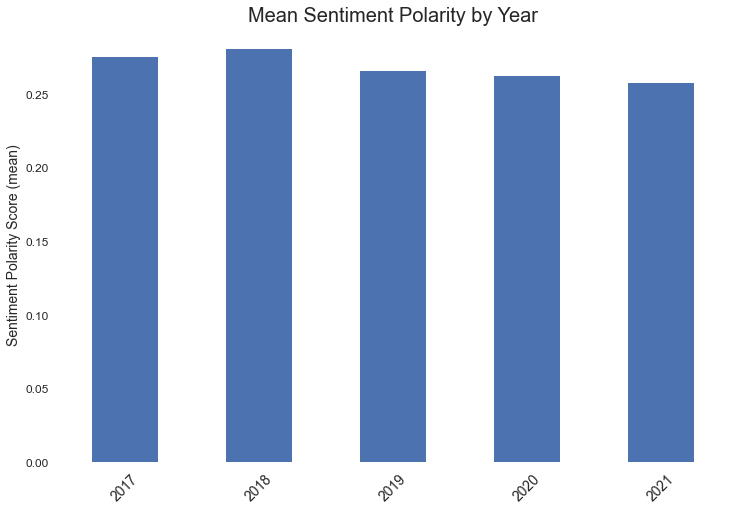

In [261]:
#ENTRY
mean_sentiment = sentiment_by_entry_df.groupby('year')['polarity'].agg(['mean'])

chart = mean_sentiment.plot(kind='bar', figsize=(12, 8), fontsize=12)
plt.title("Mean Sentiment Polarity by Year", fontsize=20)

chart.set_xlabel("", fontsize=14)
chart.tick_params(axis='x', rotation=45)
plt.xticks(fontsize=14)

chart.set_ylabel("Sentiment Polarity Score (mean)", fontsize=14)
chart.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in chart.spines.items():
    spine.set_visible(False)
    
chart.get_legend().remove()
plt.grid(False)
plt.show(chart)

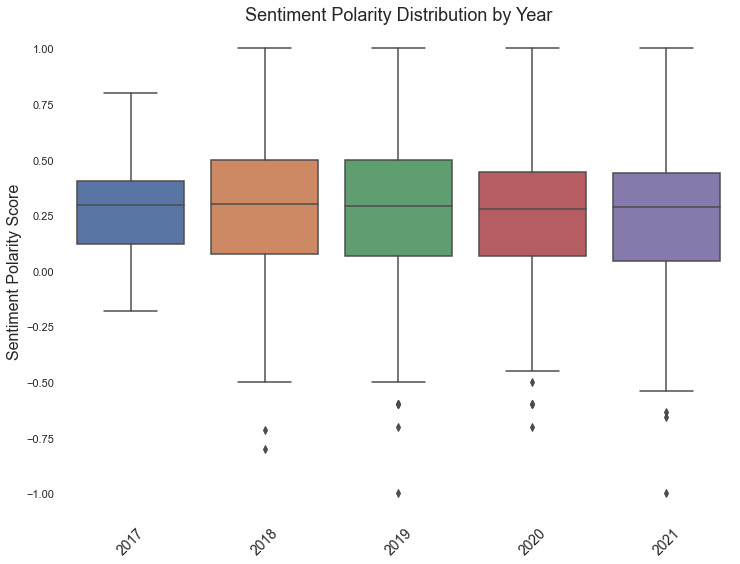

In [262]:
plt.figure(figsize=(12,9))
ax = sns.boxplot( y="polarity", x='year', data=sentiment_by_entry_df)
#ax.set_ylim([4,25])
plt.title('Sentiment Polarity Distribution by Year', fontsize=18)
#plt.xlabel('# of Ratings Group', fontsize=16)
plt.ylabel('Sentiment Polarity Score', fontsize=16)
plt.xlabel('')

ax.tick_params(axis='x', rotation=45)
plt.xticks(fontsize=14)

for key, spine in ax.spines.items():
    spine.set_visible(False)
plt.grid(False)


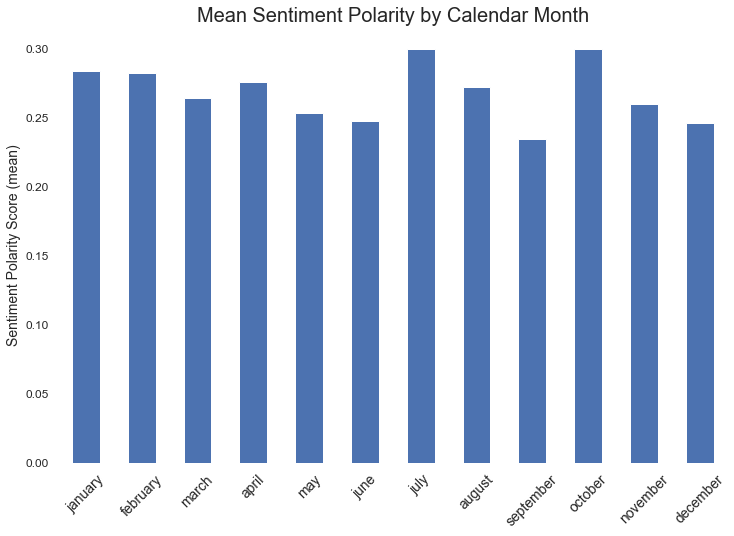

In [263]:
polarity_monthly_series = sentiment_by_entry_df.groupby(['month_integer', 'month_name'])['polarity'].mean().reset_index('month_integer')['polarity']

chart = polarity_monthly_series.plot(kind='bar', figsize=(12, 8), fontsize=12)
plt.title("Mean Sentiment Polarity by Calendar Month", fontsize=20)

chart.set_xlabel("", fontsize=14)
chart.tick_params(axis='x', rotation=45)
plt.xticks(fontsize=14)

chart.set_ylabel("Sentiment Polarity Score (mean)", fontsize=14)
chart.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in chart.spines.items():
    spine.set_visible(False)
    
plt.grid(False)
plt.show(chart)

In [264]:
import nltk
import textblob

stop_words=set(stopwords.words("english"))
pos_list_of_dicts = []

for i, row in journal_df.iterrows():
    paragraph_index = 0
    for paragraph in row['sentences_tokenized']:
        sentence_index = 0
        for sentence in paragraph:
            #remove contractions
            sentence_no_contractions = contractions.fix(sentence)
            #remove puntuation
            sentence_no_contractions = re.sub(r'[^\w\s]','',sentence_no_contractions)
            tokenized_sentence = nltk.word_tokenize(sentence_no_contractions)
            part_of_speech_phrase = nltk.pos_tag(tokenized_sentence)
            
            sentiment = TextBlob(sentence).sentiment
            polarity = sentiment[0]
            subjectivity = sentiment[1]
            lemmatized_word_list = lemmatize_with_postag(sentence_no_contractions)
            d={}
            d['sentence'] = sentence_no_contractions
            d['year']= row.year
            d['subjectivity'] = subjectivity
            d['polarity'] = polarity

            for word, lemmatized_word in zip(part_of_speech_phrase, lemmatized_word_list):
            #for word in part_of_speech_phrase:
                if word[0] not in stop_words and word[0].isalpha():
                    
                    pos_list_of_dicts.append({'word': str.lower(word[0]), 'pos': word[1], 
                                              'row_index' : i, 'paragraph_index' : paragraph_index, 
                                              'sentence_index' : sentence_index,
                                             'sentence' : sentence, 'year' : row.year,
                                             'subjectivity' : subjectivity, 'polarity' : polarity, 'lemmatized_word' : lemmatized_word})

            sentence_index += 1
        paragraph_index += 1    
pos_DF = pd.DataFrame(pos_list_of_dicts)

In [265]:
pos_lookup = {
    'NN':'noun', #	noun, singular (cat, tree)
    'NNS':'noun',#	noun plural (desks)
    'NNP':'noun',#	proper noun, singular (sarah)
    'NNPS':'noun', #proper noun, plural (indians or americans)]
    'POS' : 'noun', # possessive ending parent's'
    
    'VB': 'verb',#	verb (ask)
    'VBG': 'verb',#	verb gerund (judging)
    'VBD': 'verb',#	verb past tense (pleaded)
    'VBN': 'verb',#	verb past participle (reunified)
    'VBP': 'verb',#	verb: 'verb', present tense not 3rd person singular(wrap)
    'VBZ': 'verb', #'verb', present tense with 3rd person singular (bases)
    'MD' : 'verb', #modal could, will
    
    'JJ':'adjective',#	adjective (large)
    'JJR':'adjective',#	adjective, comparative (larger)
    'JJS':'adjective',#	adjective, superlative (largest)
    
    'FW':'foreign_word',
    
    'RB':'adverb',#	adverb (occasionally, swiftly)
    'RBR':'adverb',#	adverb, comparative (greater)
    'RBS':'adverb',#	adverb, superlative (biggest)
    
    'NNP':'proper_noun',#	proper noun, singular (sarah)
    'NNPS':'proper_noun',
    'PRP': 'proper_noun', #personal pronoun', I, he, she
    'PRP$': 'proper_noun' # possessive pronoun my, his, hers
}
pos_DF['pos_general'] = pos_DF['pos'].map(pos_lookup)

#aggregate part of speech by pos_general for easy visualization
cleaned_df = pd.DataFrame(pos_DF.groupby(['pos', 'lemmatized_word'])['pos'].count()).rename(columns={'pos':'count'}).reset_index()

nouns=[
'NN',#	noun, singular (cat, tree)
'NNS',#	noun plural (desks)
'NNP',#	proper noun, singular (sarah)
'NNPS',#proper noun, plural (indians or americans)
'POS'
]
nouns_mask = cleaned_df.pos.isin(nouns)
top_nouns = cleaned_df[nouns_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)

verbs=[
'VB',#	verb (ask)
'VBG',#	verb gerund (judging)
'VBD',#	verb past tense (pleaded)
'VBN',#	verb past participle (reunified)
'VBP',#	verb, present tense not 3rd person singular(wrap)
'VBZ',#	verb, present tense with 3rd person singular (bases)
'MD']
verbs_mask = cleaned_df.pos.isin(verbs)
top_verbs = cleaned_df[verbs_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)
top_verbs.head(40)


adjectives=[
    'JJ',#	adjective (large)
    'JJR',#	adjective, comparative (larger)
    'JJS'#	adjective, superlative (largest)
]
adjectives_mask = cleaned_df.pos.isin(adjectives)
top_adjectives = cleaned_df[adjectives_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)
top_adjectives.head(40)

foreign_word=[
    'FW'
]
FW_mask = cleaned_df.pos.isin(foreign_word)
top_FW = cleaned_df[FW_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)
top_FW.head(40)

adverbs = [
'RB',#	adverb (occasionally, swiftly)
'RBR',#	adverb, comparative (greater)
'RBS',#	adverb, superlative (biggest)
]

adverbs_mask = cleaned_df.pos.isin(adverbs)
top_adverbs = cleaned_df[adverbs_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)
top_adverbs.head(40)

proper_nouns=[
'NNP',#	proper noun, singular (sarah)
'NNPS',#proper noun, plural (indians or americans)
#'PRP',
'PRP$'
]
proper_nouns_mask = cleaned_df.pos.isin(proper_nouns)
top_proper_nouns = cleaned_df[proper_nouns_mask].groupby('lemmatized_word').sum().sort_values('count', ascending=False)

#combine everything
top_nouns['type'] = 'noun'
top_verbs['type'] = 'verb'
top_adjectives['type'] = 'adjective'
top_adverbs['type'] = 'adverbs'
top_proper_nouns['type'] = 'proper_noun'

top_words_pos = pd.concat([top_nouns, top_verbs, top_adjectives, top_adverbs, top_proper_nouns])
print(top_nouns)

                 count  type
lemmatized_word             
day                485  noun
time               379  noun
yesterday          354  noun
work               302  noun
family             156  noun
...                ...   ...
hometown             1  noun
homeless             1  noun
hole                 1  noun
hold                 1  noun
zuri                 1  noun

[1973 rows x 2 columns]


NOUNS:


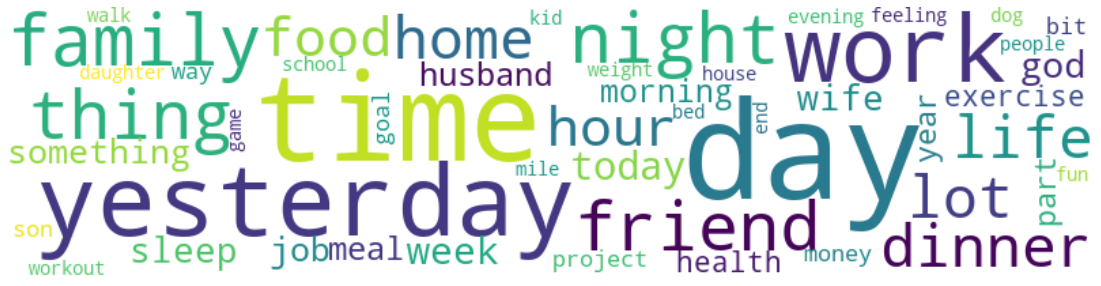

In [266]:
print('NOUNS:')
wordcloud = WordCloud(max_words=50, max_font_size=100, width=800, height=200, margin=0, background_color = "white")
wordcloud.generate_from_frequencies(frequencies=top_nouns['count'].to_dict())
plt.figure(figsize=(20,5), )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

VERBS:


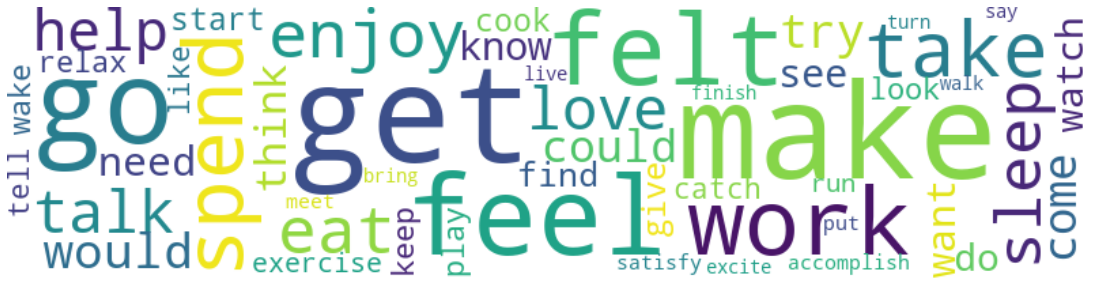

In [268]:
censor_mask = top_verbs.index!='fuck'
print('VERBS:')
wordcloud = WordCloud(max_words=50, max_font_size=100, width=800, height=200, margin=0, background_color = "white")
#wordcloud.generate_from_frequencies(frequencies=top_verbs['count'].to_dict())
wordcloud.generate_from_frequencies(frequencies=top_verbs[censor_mask]['count'].to_dict())
plt.figure(figsize=(20,5), )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ADJECTIVES:


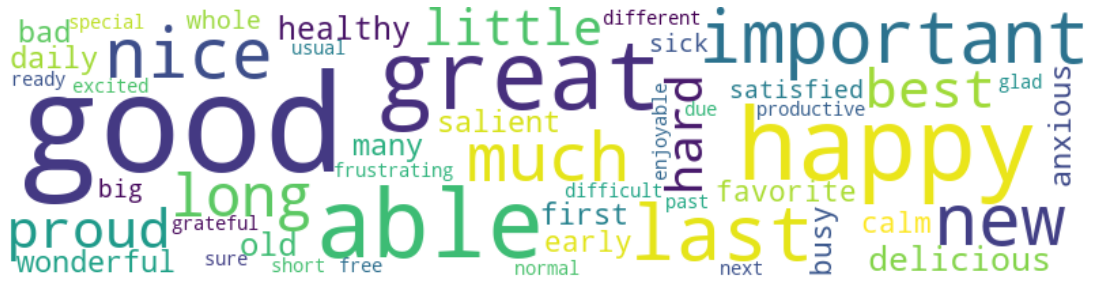

ADVERBS:


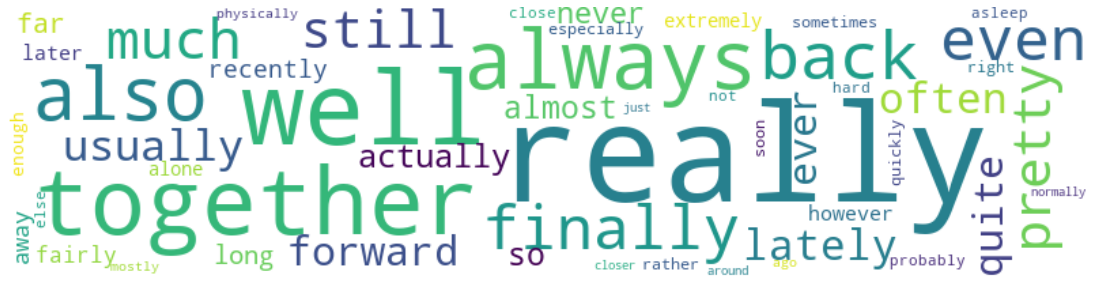

In [269]:
censor_mask = top_adjectives.index!='fucking'
print('ADJECTIVES:')
wordcloud = WordCloud(max_words=50, max_font_size=100, width=800, height=200, margin=0, background_color = "white")
wordcloud.generate_from_frequencies(frequencies=top_adjectives[censor_mask]['count'].to_dict())
plt.figure(figsize=(20,5), )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print('ADVERBS:')
wordcloud = WordCloud(max_words=50, max_font_size=100, width=800, height=200, margin=0, background_color = "white")
wordcloud.generate_from_frequencies(frequencies=top_adverbs['count'].to_dict())
plt.figure(figsize=(20,5), )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

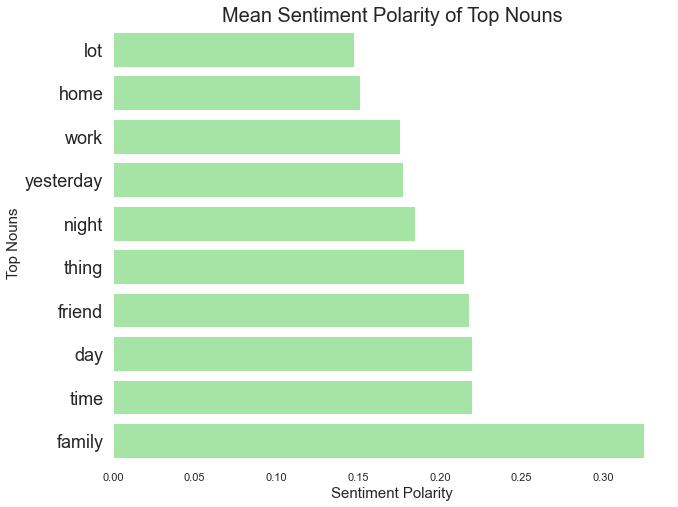

In [267]:
def get_polarity_by_top_x(reference_POS_df, POS_individual_df, part_of_speech_name, top_x):
    top_POS_list = POS_individual_df[:top_x].index.to_list()
    mask = reference_POS_df.lemmatized_word.isin(top_POS_list)
    polarity_summary = reference_POS_df[mask].groupby('lemmatized_word')['polarity'].mean().sort_values()
    plt.figure(figsize=(10,8))
    chart = sns.barplot(y=polarity_summary.index, x=polarity_summary.values, alpha=0.9, color='lightgreen')
    title = 'Mean Sentiment Polarity of Top ' + part_of_speech_name
    plt.title(title, fontsize=20)
    plt.ylabel(part_of_speech_name, fontsize=15)
    plt.xlabel('Sentiment Polarity', fontsize=15)
    ylabel = ' Top ' + part_of_speech_name
    plt.ylabel(ylabel, fontsize=15)

    plt.yticks(fontsize=18)
    
    plt.grid(False)
    for key, spine in chart.spines.items():
        spine.set_visible(False)

    plt.show()
get_polarity_by_top_x(pos_DF, top_nouns, 'Nouns', 10)

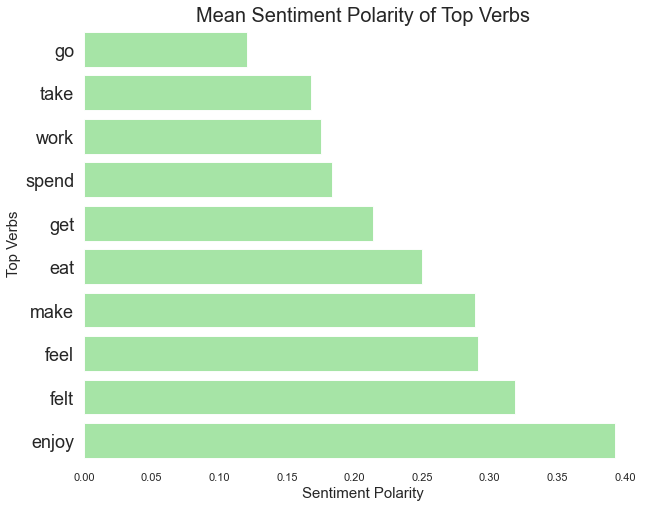

In [270]:
get_polarity_by_top_x(pos_DF, top_verbs, 'Verbs', 10)

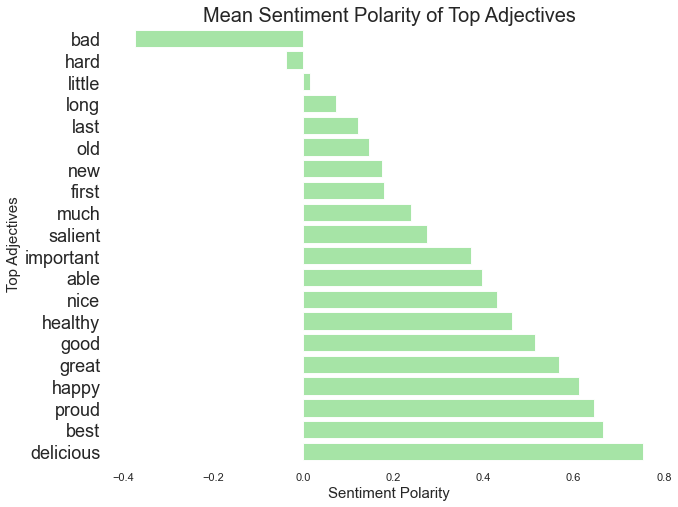

In [271]:
get_polarity_by_top_x(pos_DF, top_adjectives, 'Adjectives', 20)